# **Projekt breast cancer**

**Treść polecenia:**
Stwórz model z wykorzystaniem wybranego algorytmu uczenia maszynowego.
Model ma przewidywać czy guz nowotworowy o danych parametrach jest
łagodny (klasa B) czy złośliwy (klasa M).

W poniższym przykładzie analizujemy zakres danego pola w jakim się mieszczą wartości rekordów.

In [ ]:
import pandas as pd

# Wczytaj dane z pliku CSV
dataframe = pd.read_csv('/content/project_data/wisc_bc_data.csv')

# Funkcja do obliczenia zakresu wartości dla wszystkich kolumn
def calculate_ranges(df):
    ranges = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            min_value = df[column].min()
            max_value = df[column].max()
            ranges[column] = (min_value, max_value)
        else:
            ranges[column] = (None, None)  # Dla kolumn nienumerycznych nie obliczamy zakresu
    return ranges

# Oblicz zakresy wartości dla wszystkich kolumn
column_ranges = calculate_ranges(dataframe)

# Wyświetl wyniki
for column, (min_value, max_value) in column_ranges.items():
    if min_value is not None and max_value is not None:
        print(f"Range of '{column}' values: Min = {min_value}, Max = {max_value}")
    else:
        print(f"Column '{column}' is not numeric and has no range.")


Range of 'id' values: Min = 8670, Max = 911320502
Column 'diagnosis' is not numeric and has no range.
Range of 'radius_mean' values: Min = 6.981, Max = 28.11
Range of 'texture_mean' values: Min = 9.71, Max = 39.28
Range of 'perimeter_mean' values: Min = 43.79, Max = 188.5
Range of 'area_mean' values: Min = 143.5, Max = 2501.0
Range of 'smoothness_mean' values: Min = 0.05263, Max = 0.1634
Range of 'compactness_mean' values: Min = 0.01938, Max = 0.3454
Range of 'concavity_mean' values: Min = 0.0, Max = 0.4268
Range of 'points_mean' values: Min = 0.0, Max = 0.2012
Range of 'symmetry_mean' values: Min = 0.106, Max = 0.304
Range of 'dimension_mean' values: Min = 0.04996, Max = 0.09744
Range of 'radius_se' values: Min = 0.1115, Max = 2.873
Range of 'texture_se' values: Min = 0.3602, Max = 4.885
Range of 'perimeter_se' values: Min = 0.757, Max = 21.98
Range of 'area_se' values: Min = 6.802, Max = 542.2
Range of 'smoothness_se' values: Min = 0.001713, Max = 0.03113
Range of 'compactness_se' va

# Pola dostępne przy uczeniu modelu

* id - identyfikator diagnozy, każda liczba unikalna (zakres: 8670, 911320502)

* diagnosis - diagnoza, klasa B(łagodny) lub M(złośliwy)

* radius_mean - średni promień, zakres (6.981, 28.11)

* texture_mean - średnia tekstura, zakres (9.71, 39.28)

* perimeter_mean - średnia obwodowa, zakres (43.79, 188.5)

* area_mean - średnia pola, zakres (143.5, 2501)

* smoothness_mean - średnia gładkość, zakres (0.05263, 0.1634)

* compactness_mean - średnia zwartość, zakres (0.01938, 0.3454)

* concavity_mean - średnia wklęsłość, zakres (0.0, 0.4268)

* points_mean - średnia liczba punktów, zakres (0.0, 0.2012)

* symmetry_mean - średnia symetria, zakres (0.106, 0.304)

* dimension_mean - średnia wymiaru, zakres (0.04996, 0.09744)

* radius_se - odchylenie standardowe promienia, zakres (0.1115, 2.873)

* texture_se - odchylenie standardowe tekstury, zakres (0.3602, 4.885)

* perimeter_se - odchylenie standardowe obwodu, zakres (0.757, 21.98)

* area_se - odchylenie standardowe pola, zakres (6.802, 542.2)

* smoothness_se - odchylenie standardowe gładkości, zakres (0.001713, 0.03113)

* compactness_se - odchylenie standardowe zwartości, zakres (0.002252, 0.1354)

* concavity_se - odchylenie standardowe wklęsłości, zakres (0.0, 0.396)

* points_se - odchylenie standardowe liczby punktów, zakres (0.0, 0.05279)

* symmetry_se - odchylenie standardowe symetrii, zakres (0.007882, 0.07895)

* dimension_se - odchylenie standardowe wymiaru, zakres (0.0008948, 0.02984)

* radius_worst - najgorszy promień, zakres (7.93, 36.04)

* texture_worst - najgorsza tekstura, zakres (12.02, 49.54)

* perimeter_worst - najgorszy obwód, zakres (50.41, 251.2)

* area_worst - najgorsze pole, zakres (185.2, 4254.0)

* smoothness_worst - najgorsza gładkość, zakres (0.07117, 0.2226)

* compactness_worst - najgorsza zwartość, zakres (0.02729, 1.058)

* concavity_worst - najgorsza wklęsłość, zakres (0.0, 1.252)

* points_worst - najgorsza liczba punktów, zakres (0.0, 0.291)

* symmetry_worst - najgorsza symetria, zakres (0.1565, 0.6638)

* dimension_worst - najgorszy wymiar, zakres (0.05504, 0.2075)

# Ocena jakości danych i rozwiązanie ewentualnych problemów z jakością

* **Liczba rekordów**: 570
* **Liczba kolumn**: 32
* **Pole 'id'**: Nie wpływa na wynik, więc powinno zostać pominięte w analizie.
* **Pole 'diagnosis'**: Informuje o wyniku diagnozy, jest to klasa (B - łagodny, M - złośliwy).

* **Grupy pomiarów dostępne w badaniu**:
  1. Średnia wyników pomiarów
  2. Odchylenie standardowe pomiarów
  3. Najgorszy wynik

## Propozycje rozwiązań:

### Propozycja 1:
**Głębokie uczenie**
* Uwzględnienie wszystkich danych pomiarowych, z wyłączeniem pola 'id'.
* Wykorzystanie pola 'diagnosis' jako etykiety do uczenia.
* Skupienie się na wszystkich pomiarach oraz kilku średnich.

### Propozycja 2:
**Regresja liniowa**
* Skupienie się wyłącznie na odchyleniach standardowych oraz najgorszych wynikach.
* Uwzględnienie tych danych w modelu regresji, aby przewidzieć diagnozę.

### Propozycja 3:
**Naiwny Bayes**
* Skupienie się na najgorszych przypadkach wyników pomiarów.
* Wykorzystanie tych danych do klasyfikacji za pomocą naiwnego klasyfikatora Bayesa.


In [ ]:
#Ładoawnie danych
import pandas as pd

# Wczytaj dane z pliku CSV
dataframe = pd.read_csv('/content/project_data/wisc_bc_data.csv')
dataframe['diagnosis'] = dataframe['diagnosis'].map({'B': 0, 'M': 1})
# Wyeliminuj duplikaty na podstawie kolumny 'id'
dataframe = dataframe.drop_duplicates(subset='id')

dataframe = dataframe.drop(columns=['id'])



Przygotowanie danych do obróbki
* Pobieramy dane z pliku wisc_bc_data.csv obecnym w katalogu project_data.
* Zmieniamy pole diagnoza na binarne wartości na potrzeby trenowania.
* Rozróżniamy po id duplikaty i eliminujemy je duplikaty, jeśli jakieś są obecne.
* Usuwamy pole id, gdyż nie będzie już potrzebne nam w procesie uczenia








# Propozycja 1

Epoch 1/30
12/12 [==============================] - 1s 20ms/step - loss: 0.3822 - accuracy: 0.9011 - val_loss: 0.2355 - val_accuracy: 0.9231
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9451 - val_loss: 0.1525 - val_accuracy: 0.9341
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9615 - val_loss: 0.1232 - val_accuracy: 0.9560
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 0.0939 - accuracy: 0.9835 - val_loss: 0.1122 - val_accuracy: 0.9560
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9890 - val_loss: 0.1106 - val_accuracy: 0.9451
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9835 - val_loss: 0.1046 - val_accuracy: 0.9451
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9890 - val_loss: 0.0972 - val_accuracy: 0.9451
Epoch 8/30
12/12 [=

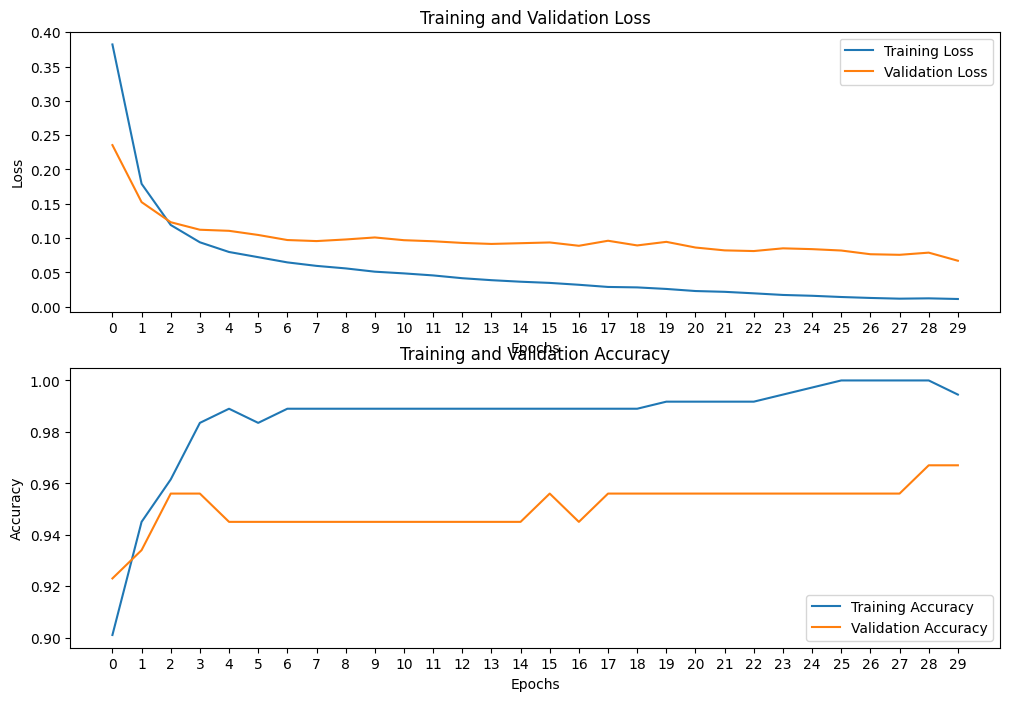

4/4 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 0.9825
Test Loss: 0.02431727759540081
Test Accuracy: 0.9824561476707458


In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Podział na dane treningowe, walidacyjne i testowe
train, test = train_test_split(dataframe, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

dataframe.drop(columns=['radius_mean','texture_mean',
                        "perimeter_mean", "area_mean",
                        "points_mean",
                        "symmetry_mean", "dimension_mean"

                        ])

# Oddzielenie cech i etykiet
train_labels = train.pop('diagnosis')
val_labels = val.pop('diagnosis')
test_labels = test.pop('diagnosis')

# Standaryzacja danych
scaler = StandardScaler()
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

# Konwersja danych do tf.data.Dataset
def df_to_dataset(features, labels, shuffle=True, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(features))
    ds = ds.batch(batch_size)
    return ds

batch_size = 32
train_ds = df_to_dataset(train, train_labels, batch_size=batch_size)
val_ds = df_to_dataset(val, val_labels, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, test_labels, shuffle=False, batch_size=batch_size)

# Budowa modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=30)

# Wizualizacja historii trenowania
import matplotlib.pyplot as plt

def plot_training_history(history):
    hist = history.history
    epochs = history.epoch

    plt.figure(figsize=(12, 8))

    # Plot loss
    plt.subplot(2, 1, 1)
    plt.plot(epochs, hist['loss'], label='Training Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.xticks(epochs)

    # Plot accuracy
    plt.subplot(2, 1, 2)
    plt.plot(epochs, hist['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.xticks(epochs)

    plt.show()

plot_training_history(history)

# Ewaluacja modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


**Omówienie wyników**

Największa zmiana poprawności jest obserwowana między pierwszą a drugą epoką. W ciągu dziesięciu pierwszych epok poprawność modelu zmienia się dynamicznie, po czym stabilizuje się do dwudziestej pierwszej epoki. Od dwudziestej siódmej epoki model osiąga poprawność na poziomie 100%.

# Propozycja 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Wybieranie tylko kolumn odchylenia standardowego
se_columns = [col for col in dataframe.columns if '_se' in col or '_worst' in col]
se_columns.append('diagnosis')  # Dodanie kolumny diagnosis do listy

dataframe_se = dataframe[se_columns]

# Podział na dane treningowe, walidacyjne i testowe
train, test = train_test_split(dataframe_se, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

# Oddzielenie cech i etykiet
train_labels = train.pop('diagnosis')
val_labels = val.pop('diagnosis')
test_labels = test.pop('diagnosis')

# Standaryzacja danych
scaler = StandardScaler()
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

# Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(train, train_labels)

# Przewidywanie na zbiorze walidacyjnym i testowym
val_predictions = model.predict(val)
test_predictions = model.predict(test)

# Zaokrąglanie przewidywań do najbliższej liczby całkowitej (0 lub 1)
val_predictions_rounded = [round(pred) for pred in val_predictions]
test_predictions_rounded = [round(pred) for pred in test_predictions]

# Ewaluacja modelu
val_accuracy = accuracy_score(val_labels, val_predictions_rounded)
test_accuracy = accuracy_score(test_labels, test_predictions_rounded)

val_cm = confusion_matrix(val_labels, val_predictions_rounded)
test_cm = confusion_matrix(test_labels, test_predictions_rounded)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Validation Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193


# Omówienie wyników

Wykorzystanie regresji liniowej, uwzględniającej jedynie odchylenia standardowe oraz najgorsze wyniki, przyniosło zadowalające rezultaty. Model osiągnął 95% poprawności na zbiorze testowym oraz około 97% poprawności na zbiorze walidacyjnym. Biorąc pod uwagę niskie koszty obliczeniowe, wyniki te są bardzo satysfakcjonujące.


# Propozycja 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix


# Wybieranie tylko kolumn odchylenia standardowego i najgorszych wyników
selected_columns = [col for col in dataframe.columns if '_se' in col or '_worst' in col]
selected_columns.append('diagnosis')  # Dodanie kolumny diagnosis do listy

dataframe_selected = dataframe[selected_columns]

# Podział na dane treningowe, walidacyjne i testowe
train, test = train_test_split(dataframe_selected, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

# Oddzielenie cech i etykiet
train_labels = train.pop('diagnosis')
val_labels = val.pop('diagnosis')
test_labels = test.pop('diagnosis')

# Standaryzacja danych
scaler = StandardScaler()
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

# Trenowanie modelu Naive Bayes
model = GaussianNB()
model.fit(train, train_labels)

# Przewidywanie na zbiorze walidacyjnym i testowym
val_predictions = model.predict(val)
test_predictions = model.predict(test)

# Ewaluacja modelu
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

val_cm = confusion_matrix(val_labels, val_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Validation Accuracy: 0.945054945054945
Test Accuracy: 0.9473684210526315


**Omówienie wyników**

Poprawność testowa i walidacyjna utrzymują się na zbliżonym poziomie, wynoszącym niecałe 95%.


# Ocena modeli

Najlepsze wyniki osiągnęła sieć neuronowa, która po 21 epokach uzyskała dokładność na poziomie 1.0, jednak wymagała ona największej ilości obliczeń. Regresja liniowa, choć nieco mniej dokładna, była znacznie bardziej oszczędna obliczeniowo. Najsłabiej wypadł algorytm oparty na naiwnym Bayesie, ale jego dokładność wciąż była zbliżona do wyników uzyskanych za pomocą regresji liniowej.
